### TDA: Housing Market Price Simple Use Case

In [1]:
# Load in data
import pandas as pd
Housing = pd.read_csv("Data\Cali_Housing_1990.csv")
Housing = Housing.dropna()
Housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
Housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [3]:
Housing.groupby('ocean_proximity').count()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,,,
<1H OCEAN,9034,9034,9034,9034,9034,9034,9034,9034,9034
INLAND,6496,6496,6496,6496,6496,6496,6496,6496,6496
ISLAND,5,5,5,5,5,5,5,5,5
NEAR BAY,2270,2270,2270,2270,2270,2270,2270,2270,2270
NEAR OCEAN,2628,2628,2628,2628,2628,2628,2628,2628,2628


Histogram and table shows heavy imbalance between <1H Ocean, Inland, Neary Bay, and Near Ocean. We will be removing the rows for "Island" as 5 data points are not outliers but regardless let's quickly see how they look like.

In [4]:
# Remove lat long
Housing.drop(['longitude', 'latitude'], axis = 1, inplace = True)

# Rename Columns
Housing.rename(
    columns = {"housing_median_age":"MedianAge",
        "total_rooms":"AllRooms",
        "total_bedrooms":"Bedrooms",
        "median_income":"MedianIncome",
        "median_house_value":"MedianValue",
        "ocean_proximity":"OceanProximity"},
    inplace = True
)

In [5]:
Housing.query("OceanProximity == 'ISLAND'")

,MedianAge,AllRooms,Bedrooms,population,households,MedianIncome,MedianValue,OceanProximity
8314,27.0,1675.0,521.0,744.0,331.0,2.1579,450000.0,ISLAND
8315,52.0,2359.0,591.0,1100.0,431.0,2.8333,414700.0,ISLAND
8316,52.0,2127.0,512.0,733.0,288.0,3.3906,300000.0,ISLAND
8317,52.0,996.0,264.0,341.0,160.0,2.7361,450000.0,ISLAND
8318,29.0,716.0,214.0,422.0,173.0,2.6042,287500.0,ISLAND


In [6]:
Housing = Housing[Housing.OceanProximity != 'ISLAND']

In [7]:
Housing.groupby('OceanProximity').count()

,MedianAge,AllRooms,Bedrooms,population,households,MedianIncome,MedianValue
OceanProximity,,,,,,,
<1H OCEAN,9034,9034,9034,9034,9034,9034,9034
INLAND,6496,6496,6496,6496,6496,6496,6496
NEAR BAY,2270,2270,2270,2270,2270,2270,2270
NEAR OCEAN,2628,2628,2628,2628,2628,2628,2628


In [8]:
# Change <1H Ocean to FAR OCEAN
Housing.replace({
    "<1H OCEAN":"Far",
    "INLAND":"InLand",
    "NEAR BAY":'NearBay',
    "NEAR OCEAN":'NearOcean'},
    inplace = True)

In [9]:
# Data process
# Shuffle dataframe using sample function
Housing = Housing.sample(frac=1)

# Select ratio
train_ratio = 0.8
val_ratio = 0.25

total_rows = Housing.shape[0]
train_size = int(total_rows*train_ratio)
 
# Split data into test and train
train_df = Housing[0:train_size]
test_df = Housing[train_size:]

train_df = train_df.sample(frac = 1)

# Validation Set
val_size = int(train_df.shape[0]*val_ratio)
val_df = train_df[0:val_size]


In [10]:
train_df = train_df.assign(House_ID = range(len(train_df)))
train_df['House_ID'] = train_df['House_ID'].astype('string')
train_df

,MedianAge,AllRooms,Bedrooms,population,households,MedianIncome,MedianValue,OceanProximity,House_ID
2923,41.0,2551.0,594.0,1342.0,595.0,1.9671,76800.0,InLand,0
9677,18.0,1795.0,416.0,483.0,208.0,4.5375,169800.0,InLand,1
11073,23.0,4388.0,864.0,2526.0,846.0,4.5217,219400.0,Far,2
15912,43.0,1663.0,330.0,935.0,335.0,4.1552,240900.0,NearBay,3
20011,27.0,1575.0,321.0,1063.0,317.0,2.1477,53900.0,InLand,4
...,...,...,...,...,...,...,...,...,...
11751,18.0,2541.0,414.0,1276.0,405.0,5.1857,220100.0,InLand,16337
10121,37.0,1128.0,273.0,931.0,234.0,2.8000,137500.0,Far,16338
15711,52.0,2083.0,491.0,1224.0,483.0,4.0882,468800.0,NearBay,16339
7501,42.0,3320.0,682.0,2105.0,632.0,1.9809,104600.0,Far,16340


Begin GenAI Data Prep!

In [11]:
from sdv.metadata import SingleTableMetadata

# Initialize metadata function
metadata = SingleTableMetadata()

# Obtain metadata
metadata.detect_from_dataframe(data = train_df)

metadata.update_column(
    column_name = 'House_ID',
    sdtype = 'id',
    regex_format = '[0-9]{1,5}'
)

metadata.update_column(
    column_name = 'OceanProximity',
    sdtype = 'categorical'
)

metadata.set_primary_key(
    column_name = 'House_ID'
)

#metadata.save_to_json('metadata.json')

In [12]:
from sdv.single_table import CTGANSynthesizer

generator = CTGANSynthesizer(
    metadata ,
    enforce_rounding = False,
    epochs = 500,
    verbose = True,
    cuda = True)

generator.fit(train_df)

c:\Users\Jeff\anaconda3\envs\GenAI_DL\Lib\site-packages\rdt\transformers\base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(
c:\Users\Jeff\anaconda3\envs\GenAI_DL\Lib\site-packages\rdt\transformers\base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(
c:\Users\Jeff\anaconda3\envs\GenAI_DL\Lib\site-packages\rdt\transformers\base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(
c:\Users\Jeff\anaconda3\envs\GenAI_DL\Lib\site-packages\rdt\transformers\base.py:132: FutureWarning: Future versions of RDT will not support the 

Epoch 1, Loss G:  0.6878,Loss D: -0.0146
Epoch 2, Loss G:  0.6931,Loss D: -0.1623
Epoch 3, Loss G:  0.1239,Loss D:  0.1415
Epoch 4, Loss G: -0.3116,Loss D: -0.0992
Epoch 5, Loss G: -0.8130,Loss D:  0.0743
Epoch 6, Loss G: -0.7124,Loss D: -0.0688
Epoch 7, Loss G: -0.8516,Loss D: -0.0425
Epoch 8, Loss G: -1.1676,Loss D:  0.0150
Epoch 9, Loss G: -1.3495,Loss D:  0.2037
Epoch 10, Loss G: -1.2230,Loss D:  0.0575
Epoch 11, Loss G: -1.4374,Loss D: -0.0522
Epoch 12, Loss G: -1.5532,Loss D:  0.1453
Epoch 13, Loss G: -1.6125,Loss D:  0.0705
Epoch 14, Loss G: -1.4470,Loss D: -0.0890
Epoch 15, Loss G: -1.5495,Loss D: -0.0195
Epoch 16, Loss G: -1.6500,Loss D:  0.0641
Epoch 17, Loss G: -1.5791,Loss D:  0.0121
Epoch 18, Loss G: -1.6934,Loss D: -0.1912
Epoch 19, Loss G: -1.7468,Loss D: -0.0522
Epoch 20, Loss G: -1.8042,Loss D:  0.0883
Epoch 21, Loss G: -1.6994,Loss D:  0.0290
Epoch 22, Loss G: -1.7171,Loss D: -0.1146
Epoch 23, Loss G: -1.6561,Loss D:  0.0193
Epoch 24, Loss G: -1.7191,Loss D: -0.0864
E

In [14]:
from sdv.evaluation.single_table import run_diagnostic

train_synthetic = generator.sample(num_rows=8300, batch_size=100)


Sampling rows: 100%|██████████| 8300/8300 [00:02<00:00, 3126.18it/s]


In [15]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data=train_df,
    synthetic_data=train_synthetic,
    metadata=metadata)

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 36/36 [00:00<00:00, 126.76it/s]

Overall Quality Score: 82.9%

Properties:
- Column Shapes: 93.82%
- Column Pair Trends: 71.98%


In [16]:
train_df.groupby('OceanProximity').count()

,MedianAge,AllRooms,Bedrooms,population,households,MedianIncome,MedianValue,House_ID
OceanProximity,,,,,,,,
Far,7159,7159,7159,7159,7159,7159,7159,7159
InLand,5235,5235,5235,5235,5235,5235,5235,5235
NearBay,1825,1825,1825,1825,1825,1825,1825,1825
NearOcean,2123,2123,2123,2123,2123,2123,2123,2123


In [ ]:
from sdv.sampling import Condition
c1 = Condition(
    num_rows= MedianAge
)

In [39]:
train = train_df.drop('House_ID', axis = 1)
train_synthetic = train_synthetic.drop('House_ID', axis = 1)
train_synthetic['MedianAge'] = train_synthetic['MedianAge'].round()
train_aug = pd.concat([train_df, train_synthetic])

(3/3) Evaluating Synthesis: : 100%|██████████| 1/1 [13:21<00:00, 801.99s/it]


KeyError: "['House_ID'] not found in axis"

array([[<AxesSubplot: title={'center': 'MedianAge'}>,
        <AxesSubplot: title={'center': 'AllRooms'}>,
        <AxesSubplot: title={'center': 'Bedrooms'}>],
       [<AxesSubplot: title={'center': 'population'}>,
        <AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'MedianIncome'}>],
       [<AxesSubplot: title={'center': 'MedianValue'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

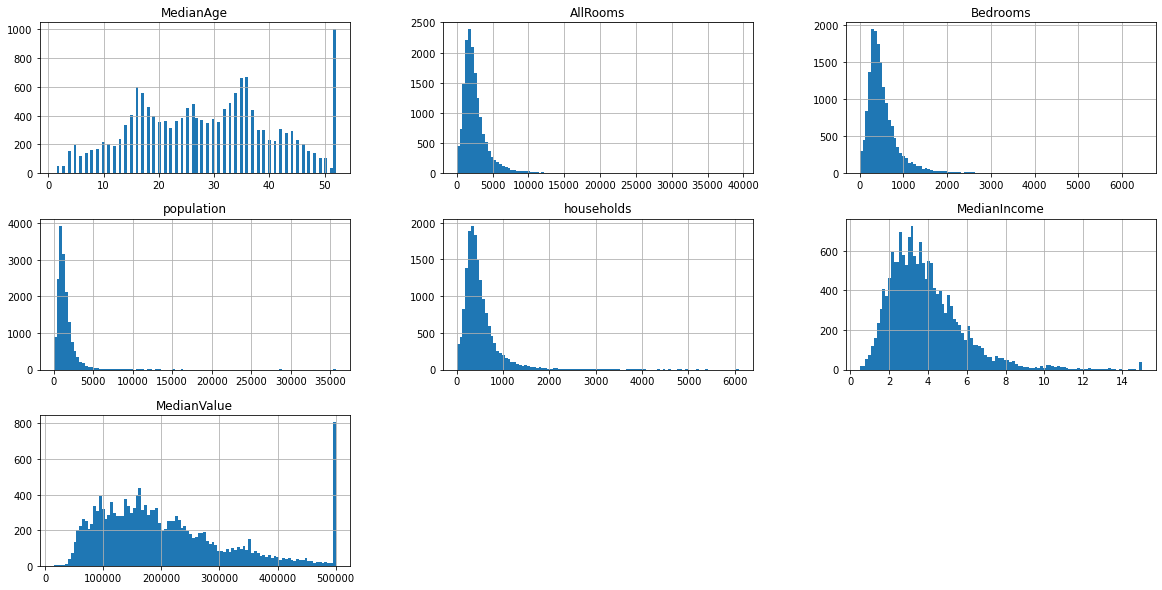

In [18]:
train.hist(bins = 100,figsize=(20, 10))

array([[<AxesSubplot: title={'center': 'MedianAge'}>,
        <AxesSubplot: title={'center': 'AllRooms'}>,
        <AxesSubplot: title={'center': 'Bedrooms'}>],
       [<AxesSubplot: title={'center': 'population'}>,
        <AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'MedianIncome'}>],
       [<AxesSubplot: title={'center': 'MedianValue'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

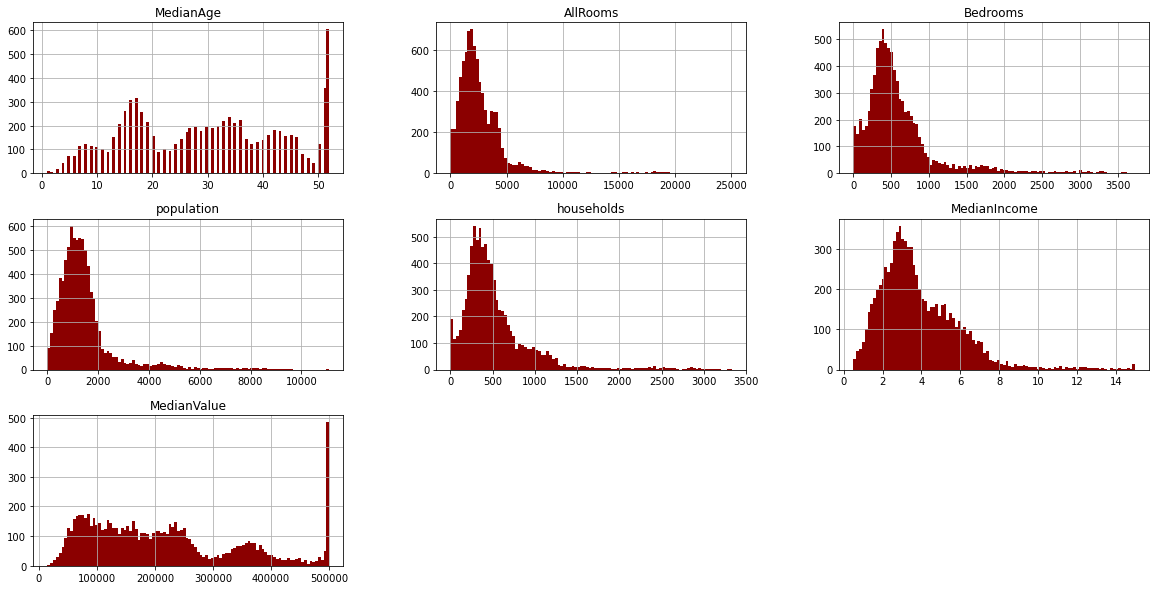

In [19]:
train_synthetic.hist(bins = 100,figsize=(20, 10), color = 'darkred')

array([[<AxesSubplot: title={'center': 'MedianAge'}>,
        <AxesSubplot: title={'center': 'AllRooms'}>,
        <AxesSubplot: title={'center': 'Bedrooms'}>],
       [<AxesSubplot: title={'center': 'population'}>,
        <AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'MedianIncome'}>],
       [<AxesSubplot: title={'center': 'MedianValue'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

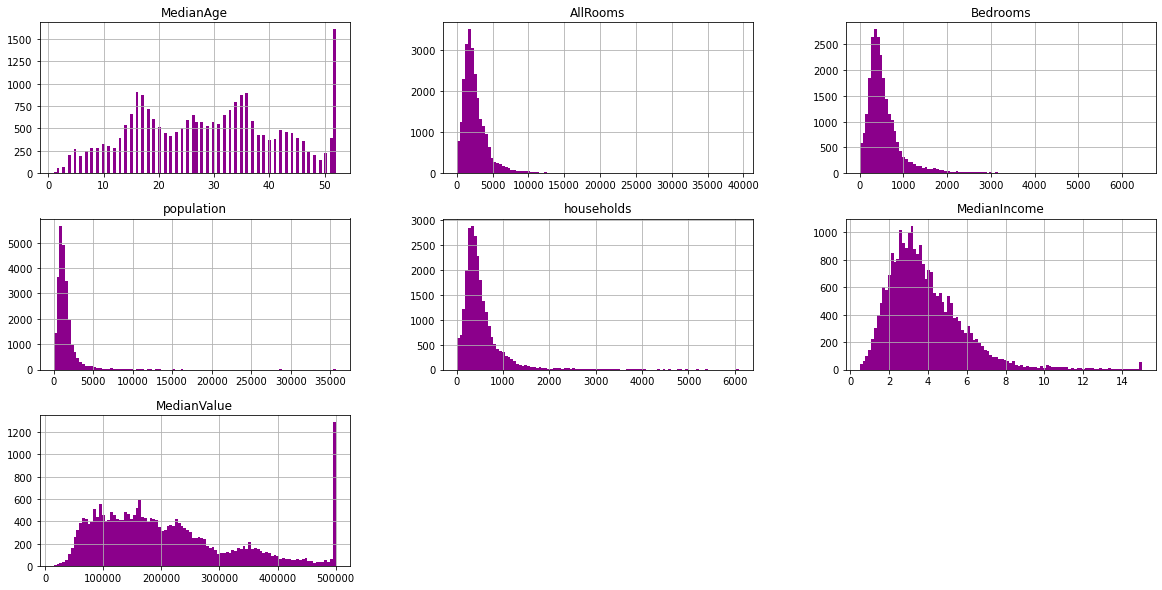

In [20]:
train_aug.hist(bins = 100,figsize=(20, 10), color = 'darkmagenta')

In [58]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
#train_synthetic = train_synthetic.drop('House_ID', axis = 1)
train_synthetic['MedianAge'] = train_synthetic['MedianAge'].round()
train_aug = pd.concat([train, train_synthetic])

In [27]:
train_dummies = pd.get_dummies(train['OceanProximity'])
aug_dummies = pd.get_dummies(train_aug['OceanProximity'])
test_dummies = pd.get_dummies(test_df['OceanProximity'])
val_dummies = pd.get_dummies(val_df['OceanProximity'])

In [32]:
train = train.drop('OceanProximity', axis = 1)
aug = train_aug.drop('OceanProximity', axis = 1)
test = test_df.drop('OceanProximity', axis = 1)
val = val_df.drop('OceanProximity', axis = 1)

In [33]:
train = pd.concat([train, train_dummies], axis = 1)
train_aug = pd.concat([train_aug, aug_dummies], axis = 1)
test = pd.concat([test, test_dummies], axis = 1)
val = pd.concat([val, val_dummies], axis = 1)


In [47]:
train = train.drop('OceanProximity', axis = 1)

In [61]:
aug_dummies = pd.get_dummies(train_aug['OceanProximity'])


In [72]:
test

,MedianAge,AllRooms,Bedrooms,population,households,MedianIncome,MedianValue,Far,InLand,NearBay,NearOcean
2054,36.0,1432.0,269.0,836.0,237.0,2.1563,88300.0,False,True,False,False
5758,22.0,2664.0,651.0,1553.0,629.0,3.6354,256300.0,True,False,False,False
9076,35.0,3114.0,583.0,1974.0,545.0,3.9028,126800.0,False,True,False,False
19384,16.0,1174.0,249.0,601.0,242.0,1.7143,113300.0,False,True,False,False
5136,46.0,1086.0,249.0,880.0,250.0,1.5962,95700.0,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10755,45.0,1883.0,419.0,653.0,328.0,4.2222,500001.0,True,False,False,False
11867,23.0,1127.0,225.0,215.0,85.0,3.4844,143800.0,False,True,False,False
19081,29.0,2375.0,560.0,1124.0,502.0,2.3276,166200.0,True,False,False,False
13961,13.0,4137.0,796.0,573.0,218.0,4.6394,226500.0,False,True,False,False


In [64]:
aug = aug.drop('House_ID', axis = 1)


In [67]:
aug = pd.concat([aug, aug_dummies], axis = 1)

In [68]:
aug

,MedianAge,AllRooms,Bedrooms,population,households,MedianIncome,MedianValue,Far,InLand,NearBay,NearOcean
2923,41.0,2551.000000,594.000000,1342.000000,595.000000,1.967100,76800.000000,False,False,False,False
9677,18.0,1795.000000,416.000000,483.000000,208.000000,4.537500,169800.000000,False,False,False,False
11073,23.0,4388.000000,864.000000,2526.000000,846.000000,4.521700,219400.000000,False,False,False,False
15912,43.0,1663.000000,330.000000,935.000000,335.000000,4.155200,240900.000000,False,False,False,False
20011,27.0,1575.000000,321.000000,1063.000000,317.000000,2.147700,53900.000000,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
8295,36.0,438.658458,116.136571,695.885894,6.810127,3.638407,140256.558893,False,True,False,False
8296,42.0,180.172738,65.624956,255.641148,36.321616,3.624856,99877.420132,False,True,False,False
8297,52.0,2576.803758,728.250515,1556.307707,637.676639,1.768637,136249.180004,False,False,True,False
8298,14.0,4490.522270,944.089028,4902.183472,1547.844238,4.163605,210140.426858,True,False,False,False


In [71]:
x_train = train.drop('MedianValue', axis = 1)
y_train = train['MedianValue']

x_aug = aug.drop('MedianValue', axis = 1)
y_aug = aug['MedianValue']

x_test = test.drop('MedianValue', axis = 1)
y_test = test['MedianValue']

x_val = val.drop('MedianValue', axis = 1)
y_val = val['MedianValue']


In [77]:
x_train

,MedianAge,AllRooms,Bedrooms,population,households,MedianIncome,Far,InLand,NearBay,NearOcean
2923,41.0,2551.0,594.0,1342.0,595.0,1.9671,False,True,False,False
9677,18.0,1795.0,416.0,483.0,208.0,4.5375,False,True,False,False
11073,23.0,4388.0,864.0,2526.0,846.0,4.5217,True,False,False,False
15912,43.0,1663.0,330.0,935.0,335.0,4.1552,False,False,True,False
20011,27.0,1575.0,321.0,1063.0,317.0,2.1477,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
11751,18.0,2541.0,414.0,1276.0,405.0,5.1857,False,True,False,False
10121,37.0,1128.0,273.0,931.0,234.0,2.8000,True,False,False,False
15711,52.0,2083.0,491.0,1224.0,483.0,4.0882,False,False,True,False
7501,42.0,3320.0,682.0,2105.0,632.0,1.9809,True,False,False,False


In [78]:
reg = LinearRegression().fit(x_train, y_train)
#reg.score(x_test,y_test)

In [79]:
reg.score(x_test, y_test)

0.6429768800481561

In [80]:
reg.score(x_val, y_val)

0.6307508240070623

In [81]:
reg2 = LinearRegression().fit(x_aug, y_aug)

In [82]:
reg2.score(x_test, y_test)

0.6227550252150154